**Your Name: Ryan Essem**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


There are two files. One called "voting.csv" the other is called "gender.csv". Create 2 data frames. One called `voting` and the other called `gender` and fill them with the data from the corresponding file.  
Use relative paths to load load the files.

**(1)** Load 'voting.csv' from the data folder into a DataFrame called `voting`

In [2]:
# FILL-IN 1
import glob

path = 'data/' #relative path

vote_csv = glob.glob(path + "voting.csv") # data/voting.csv
vote_csv

voting = pd.read_csv(vote_csv[0]) #Index 0 defines the file specified in 'find_vote_csv'
voting.head(3)

,Year,18-24 Voted,18-24 Registered,25-44 Voted,25-44 Registered,45-64 Voted,45-64 Registered,65 and over Voted,65 and over Registered,Total Voted,Total Registered
0,1980,?,?,?,?,?,?,?,?,?,?
1,1982,7139000,12227000,30343000,41103000,27491000,33422000,15336000,19245000,80309000,105997000
2,1984,?,?,?,?,?,?,?,?,?,?


**(2)** Load 'gender.csv' from the data folder into a DataFrame called `gender`

In [3]:
# FILL-IN 2

path = 'data/' #relative path

gender_csv = glob.glob(path + "gender.csv") # data/gender.csv
gender_csv

gender = pd.read_csv(gender_csv[0]) #Index 0 defines the file specified in 'gender_csv'
gender.head(5)

,Year,Male,Female,Total Voted
0,1980,43753000,49312000,93065000
1,1982,38025000,42285000,80309000
2,1984,47354000,54524000,101878000
3,1986,37729000,42225000,79955000
4,1988,?,?,?


**(3)** Perform Level 1 data cleaning on the *gender* dataframe.  
Make sure that any missing values are converted to NaN.  
Add comments that identify the aspect of Level 1 that a line or lines of code fixes.

In [4]:
# FILL-IN 4
gender.rename(columns={'Total Voted':'TotalVotes'}, inplace=True) # changed to codable version e.g df.TotalVotes
gender.replace('?', np.NaN, inplace=True) #replaces the string '?' and converts it into
# NaN using built in numpy function, inplace = True modifies original csv.

In [5]:
gender.head(5)

,Year,Male,Female,TotalVotes
0,1980,43753000,49312000,93065000
1,1982,38025000,42285000,80309000
2,1984,47354000,54524000,101878000
3,1986,37729000,42225000,79955000
4,1988,NaN,NaN,NaN


In [6]:
#convert columns to integers because votes are numerical values, not objects/strings.
#coerce will handle the float NaN error you get when trying to convert the columns to ints.

gender['Male'] = pd.to_numeric(gender['Male'], errors='coerce')
gender['Female'] = pd.to_numeric(gender['Female'], errors='coerce')
gender['TotalVotes'] = pd.to_numeric(gender['TotalVotes'], errors='coerce')

#gender.astype({'Male': 'Int64', 'Female': 'Int64', 'TotalVotes': 'Int64'})

In [7]:
gender.dtypes # further confirm datatypes

Year            int64
Male          float64
Female        float64
TotalVotes    float64
dtype: object

**(4)** *gender* contains 18 observations and 4 variables. The variables' data is numerical, but there may be missing values.

Verify this information about the *gender* data frame using Pandas.

In [8]:
print(gender.columns)

Index(['Year', 'Male', 'Female', 'TotalVotes'], dtype='object')


In [9]:
# FILL-IN 3
print('Number of missing values:')
for col in gender.columns: # loops through columns and finds missing values and prints
    # the total number of missing values.
    numMV = sum(gender[col].isna())
    print('{}:{}'.format(col,numMV))

Number of missing values:
Year:0
Male:4
Female:4
TotalVotes:4


In [10]:
float_cols = gender.select_dtypes(include=['float']) 
print(float_cols) #selects float columns and prints. Floats are also considered numeric
# Also, year is not included because it is an int64, while this code strictly asks for floats

#Cannot convert male, female, and total vote columns to ints because of NaN vals, they are
#recognized as floats.

          Male      Female   TotalVotes
0   43753000.0  49312000.0   93065000.0
1   38025000.0  42285000.0   80309000.0
2   47354000.0  54524000.0  101878000.0
3   37729000.0  42225000.0   79955000.0
4          NaN         NaN          NaN
5   38659000.0  43331000.0   81990000.0
6   53312000.0  60554000.0  113866000.0
7          NaN         NaN          NaN
8          NaN         NaN          NaN
9          NaN         NaN          NaN
10  51542000.0  59284000.0  110826000.0
11  41801000.0  47102000.0   88904000.0
12  58455000.0  67281000.0  125736000.0
13  45118000.0  51001000.0   96119000.0
14  60729000.0  70415000.0  131144000.0
15  45392000.0  50595000.0   95987000.0
16  61551000.0  71397000.0  132949000.0
17  43009000.0  49243000.0   92251000.0


In [11]:
gender #call the dataframe, we can clarify our changes were made
#Total Voted changed to TotalVoted, '?' converted into NaN and from the previous cells
#our datatypes were changed from objects to floats

,Year,Male,Female,TotalVotes
0,1980,43753000.0,49312000.0,93065000.0
1,1982,38025000.0,42285000.0,80309000.0
2,1984,47354000.0,54524000.0,101878000.0
3,1986,37729000.0,42225000.0,79955000.0
4,1988,NaN,NaN,NaN
5,1990,38659000.0,43331000.0,81990000.0
6,1992,53312000.0,60554000.0,113866000.0
7,1994,NaN,NaN,NaN
8,1996,NaN,NaN,NaN
9,1998,NaN,NaN,NaN


**(5)** Perform Level 1 data cleaing on the *voting* dataframe.  
Make sure that any missing values are coverted to NaN.
Add comments that identify the aspect of Level 1 that a line or lines of code fixes.

In [12]:
# FILL-IN 6

voting.rename(columns={
    '18-24 Voted': 'Young_Adults_Voted',
    '18-24 Registered': 'Young_Adults_Registered',
    '25-44 Voted': 'Mid_Age_Adults_Voted',
    '25-44 Registered': 'Mid_Age_Adults_Registered',
    '45-64 Voted': 'Older_Adults_Voted',
    '45-64 Registered': 'Older_Adults_Registered',
    '65 and over Voted': 'Seniors_Voted',
    '65 and over Registered': 'Seniors_Registered',
    'Total Voted': 'TotalVoted',
    'Total Registered': 'Total_Registered'
}, inplace=True) # changed columns to codable version e.g voting_df.Young_Adults_Voted

voting.replace('?', np.NaN, inplace=True) #replaces the string '?' and converts it into
# NaN using built in numpy function, inplace = True modifies original csv.

voting

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,TotalVoted,Total_Registered
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982,7139000,12227000,30343000,41103000,27491000,33422000,15336000,19245000,80309000,105997000
2,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986,5782000,11109000,31003000,45790000,26305000,33528000,16865000,21300000,79955000,111727000
4,1988,9254000,12321000,42018000,49066000,31134000,34622000,19818000,22580000,102224000,118589000
5,1990,5072000,9896000,32766000,47020000,26138000,33480000,18014000,22853000,81990000,113249000
6,1992,10442000,12787000,47388000,52725000,34399000,37016000,21637000,24049000,113866000,126577000
7,1994,5050000,10659000,32689000,48023000,28878000,36541000,19086000,23771000,85703000,118994000
8,1996,7996000,12018000,41051000,51606000,34615000,39490000,21356000,24547000,105018000,127661000
9,1998,4251000,10014000,28889000,47902000,30758000,40861000,19200000,24326000,83098000,123103000


In [13]:
voting_df2 = voting.apply(pd.to_numeric, errors='coerce') #convert entire dataframe into 
#numeric datatypes
voting_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       18 non-null     int64  
 1   Young_Adults_Voted         15 non-null     float64
 2   Young_Adults_Registered    15 non-null     float64
 3   Mid_Age_Adults_Voted       15 non-null     float64
 4   Mid_Age_Adults_Registered  15 non-null     float64
 5   Older_Adults_Voted         15 non-null     float64
 6   Older_Adults_Registered    15 non-null     float64
 7   Seniors_Voted              15 non-null     float64
 8   Seniors_Registered         15 non-null     float64
 9   TotalVoted                 15 non-null     float64
 10  Total_Registered           15 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.7 KB


**(6)** *voting* contains 18 observations and 11 variables. The variables break apart the voting data into age groups that were registered to vote and the number that actually voted. The variables' data is numerical, but there may be missing values.

Use a pandas function that would allow you to verify this information about the *voting* data frame.

In [14]:
# FILL-IN 5
print('Number of missing values:')
for col in voting.columns: # loops through columns and finds missing values and prints
    # the total number of missing values.
    numMV = sum(voting_df2[col].isna())
    print('{}:{}'.format(col,numMV))

Number of missing values:
Year:0
Young_Adults_Voted:3
Young_Adults_Registered:3
Mid_Age_Adults_Voted:3
Mid_Age_Adults_Registered:3
Older_Adults_Voted:3
Older_Adults_Registered:3
Seniors_Voted:3
Seniors_Registered:3
TotalVoted:3
Total_Registered:3


In [15]:
float_cols = voting_df2.select_dtypes(include=['float']) 
print(float_cols) #selects float columns and prints. Floats are also considered numeric
# Also, year is not included because it is an int64, while this code strictly asks for floats

#Cannot convert the other columns ints because of NaN vals, they are
#recognized as floats.

    Young_Adults_Voted  Young_Adults_Registered  Mid_Age_Adults_Voted  \
0                  NaN                      NaN                   NaN   
1            7139000.0               12227000.0            30343000.0   
2                  NaN                      NaN                   NaN   
3            5782000.0               11109000.0            31003000.0   
4            9254000.0               12321000.0            42018000.0   
5            5072000.0                9896000.0            32766000.0   
6           10442000.0               12787000.0            47388000.0   
7            5050000.0               10659000.0            32689000.0   
8            7996000.0               12018000.0            41051000.0   
9            4251000.0               10014000.0            28889000.0   
10                 NaN                      NaN                   NaN   
11           4697000.0               10470000.0            28019000.0   
12          11639000.0               14334000.0    

## Combine two DataFrames

__(7)__ Use the Pandas function *merge* to combine the DataFrames 'voting' and 'gender' on the 'Year' column into a single new DataFrame named `votes_df`.

In [16]:
# FILL-IN 7
votes_df = pd.merge(voting_df2, gender, on= 'Year') #merge datasets on year col
votes_df

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,TotalVoted,Total_Registered,Male,Female,TotalVotes
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43753000.0,49312000.0,93065000.0
1,1982,7139000.0,12227000.0,30343000.0,41103000.0,27491000.0,33422000.0,15336000.0,19245000.0,80309000.0,105997000.0,38025000.0,42285000.0,80309000.0
2,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47354000.0,54524000.0,101878000.0
3,1986,5782000.0,11109000.0,31003000.0,45790000.0,26305000.0,33528000.0,16865000.0,21300000.0,79955000.0,111727000.0,37729000.0,42225000.0,79955000.0
4,1988,9254000.0,12321000.0,42018000.0,49066000.0,31134000.0,34622000.0,19818000.0,22580000.0,102224000.0,118589000.0,NaN,NaN,NaN
5,1990,5072000.0,9896000.0,32766000.0,47020000.0,26138000.0,33480000.0,18014000.0,22853000.0,81990000.0,113249000.0,38659000.0,43331000.0,81990000.0
6,1992,10442000.0,12787000.0,47388000.0,52725000.0,34399000.0,37016000.0,21637000.0,24049000.0,113866000.0,126577000.0,53312000.0,60554000.0,113866000.0
7,1994,5050000.0,10659000.0,32689000.0,48023000.0,28878000.0,36541000.0,19086000.0,23771000.0,85703000.0,118994000.0,NaN,NaN,NaN
8,1996,7996000.0,12018000.0,41051000.0,51606000.0,34615000.0,39490000.0,21356000.0,24547000.0,105018000.0,127661000.0,NaN,NaN,NaN
9,1998,4251000.0,10014000.0,28889000.0,47902000.0,30758000.0,40861000.0,19200000.0,24326000.0,83098000.0,123103000.0,NaN,NaN,NaN


## Missing Values

**(8)** How many rows __do not have__ missing values in the '18-24 Voted' column?

    '18-24 Voted': 'Young_Adults_Voted',
    '18-24 Registered': 'Young_Adults_Registered',
    '25-44 Voted': 'Mid_Age_Adults_Voted',
    '25-44 Registered': 'Mid_Age_Adults_Registered',
    '45-64 Voted': 'Older_Adults_Voted',
    '45-64 Registered': 'Older_Adults_Registered',
    '65 and over Voted': 'Seniors_Voted',
    '65 and over Registered': 'Seniors_Registered',
    'Total Voted': 'TotalVoted',
    'Total Registered': 'Total_Registered'

In [17]:
# FILL-IN 8
eigtwentyfour = 'Young_Adults_Voted'
num_non_missing = votes_df['Young_Adults_Voted'].notnull().sum() #totals number of non-missing values in 18-24 column
print("Number of rows with non-missing values in 18-24 column:", num_non_missing) #prints out the total of non-missing vals

# 18 rows (0-17), three NaN's in the row.. 18-3 = 15. There are 15 rows w/ non-missing values... it checks out

Number of rows with non-missing values in 18-24 column: 15


**(9)** Create a dataframe name `dropped_df` with all of the rows containing missing values dropped. 

In [18]:
# FILL-IN 9
dropped_df = votes_df.dropna() #drop all rows with missing vals in df
dropped_df

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,TotalVoted,Total_Registered,Male,Female,TotalVotes
1,1982,7139000.0,12227000.0,30343000.0,41103000.0,27491000.0,33422000.0,15336000.0,19245000.0,80309000.0,105997000.0,38025000.0,42285000.0,80309000.0
3,1986,5782000.0,11109000.0,31003000.0,45790000.0,26305000.0,33528000.0,16865000.0,21300000.0,79955000.0,111727000.0,37729000.0,42225000.0,79955000.0
5,1990,5072000.0,9896000.0,32766000.0,47020000.0,26138000.0,33480000.0,18014000.0,22853000.0,81990000.0,113249000.0,38659000.0,43331000.0,81990000.0
6,1992,10442000.0,12787000.0,47388000.0,52725000.0,34399000.0,37016000.0,21637000.0,24049000.0,113866000.0,126577000.0,53312000.0,60554000.0,113866000.0
11,2002,4697000.0,10470000.0,28019000.0,45553000.0,35521000.0,46430000.0,20667000.0,25701000.0,88904000.0,128154000.0,41801000.0,47102000.0,88904000.0
12,2004,11639000.0,14334000.0,42845000.0,49370000.0,47327000.0,51660000.0,23925000.0,26706000.0,125736000.0,142070000.0,58455000.0,67281000.0,125736000.0
13,2006,5524000.0,11554000.0,28216000.0,45099000.0,40725000.0,52171000.0,21654000.0,27023000.0,96119000.0,135847000.0,45118000.0,51001000.0,96119000.0
14,2008,12515000.0,15082000.0,42366000.0,48184000.0,50744000.0,54944000.0,25519000.0,28100000.0,131144000.0,146310000.0,60729000.0,70415000.0,131144000.0
15,2010,5682000.0,12095000.0,26122000.0,43414000.0,41248000.0,53499000.0,22935000.0,28255000.0,95987000.0,137263000.0,45392000.0,50595000.0,95987000.0
16,2012,11353000.0,14766000.0,39942000.0,47896000.0,52013000.0,57795000.0,29641000.0,32700000.0,132949000.0,153157000.0,61551000.0,71397000.0,132949000.0


**(10)** How many values are in the '18-24 Voted' column in `dropped_df`?

In [19]:
# FILL-IN 10

num_values = dropped_df['Young_Adults_Voted'].count() #count function, counts
# the number of values in the specified column.
print("Number of values:", num_values) #prints out the number of vals



Number of values: 11


**(11)** Calculate the difference of the mean between the '18-24 Voted' column in the `votes_df` and `dropped_df` dataframes.

In [20]:
# FILL-IN 11
votes_mean = votes_df['Young_Adults_Voted'].mean() #calc the mean
dropped_mean = dropped_df['Young_Adults_Voted'].mean() #calc the mean

diff = votes_mean - dropped_mean # subtracts the means to receive the difference

print("Difference in means is:", diff)


Difference in means is: -280018.18181818165


**(12)** Explain why the mean different after you drop all the missing rows from the dataframe. What are our options for dealing with these missing values?

__# FILL-IN__ 12

**Answer**: Dropping the missing values from a dataframe affects the mean because it results in a change of total observations needed to calculate the mean. The mean is calculated by adding up the number of all values in the dataset and then dividing them by the number of observations. Removing the rows of missing values, reduced the number of observations-- resulting into a different mean from the unaffected dataset.

Our options with dealing with missing values are keeping it as is, filling the missing values with zeroes (0), dropping rows or columns with missing values, or estimating and assiging a value.

The `votes_df` dataframe (the origin dataframe that has missing values) now contains two columns that represent the total number of people that voted during the year of the observation.

We should compare those two columns representing the total number of votes to see if they to find out.

**(13)** First create a DataFrame named `comp_df` with just the columns for the year and the two columns that have the total number of votes.

In [21]:
# FILL-IN 13
comp_df = votes_df.loc[:, ['Year', 'TotalVoted', 'TotalVotes']] 
# .loc returns the specified columns of year, totalvoted, totalvotes
comp_df

,Year,TotalVoted,TotalVotes
0,1980,NaN,93065000.0
1,1982,80309000.0,80309000.0
2,1984,NaN,101878000.0
3,1986,79955000.0,79955000.0
4,1988,102224000.0,NaN
5,1990,81990000.0,81990000.0
6,1992,113866000.0,113866000.0
7,1994,85703000.0,NaN
8,1996,105018000.0,NaN
9,1998,83098000.0,NaN


**(14)** We want know if the non-missing values in both columns are equal. So now remove all of the rows with missing values from the `comp_df` dataframe.

In [22]:
# FILL-IN 14
cleaned_comp_df = comp_df.dropna() #drops missing values throughout df
cleaned_comp_df

,Year,TotalVoted,TotalVotes
1,1982,80309000.0,80309000.0
3,1986,79955000.0,79955000.0
5,1990,81990000.0,81990000.0
6,1992,113866000.0,113866000.0
11,2002,88904000.0,88904000.0
12,2004,125736000.0,125736000.0
13,2006,96119000.0,96119000.0
14,2008,131144000.0,131144000.0
15,2010,95987000.0,95987000.0
16,2012,132949000.0,132949000.0


**(15)** Now write code that compares the values in the two columns to see if they contain the same values. 

In [23]:
# FILL-IN 15
if cleaned_comp_df['TotalVoted'].equals(cleaned_comp_df['TotalVotes']):
    #checks for equalty in specified columns
    print("Both columns contain the same values") # if equal print this
else:
    print("Both columns do not contain the same values") # if not print this

Both columns contain the same values


**Also confirmed by output in question 14.**

Now that we know that the two columns have the same values stored for each year where, then it seems safe to fill the missing values in one with the values from the other column.

**(16)** Create a new column named 'Total_Voted' in `votes_df` and save into it all of the values for the total number of votes by using the values from both columns to create a column with no missing values. (Hint: This can be completed in one line using the pandas function *fillna*.)

In [24]:
# FILL-IN 16
#creates column total_voted and fills missing values with the values of totalvoted.
votes_df['Total_Voted'] = votes_df['TotalVotes'].fillna(votes_df['TotalVoted'])
votes_df

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,TotalVoted,Total_Registered,Male,Female,TotalVotes,Total_Voted
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43753000.0,49312000.0,93065000.0,93065000.0
1,1982,7139000.0,12227000.0,30343000.0,41103000.0,27491000.0,33422000.0,15336000.0,19245000.0,80309000.0,105997000.0,38025000.0,42285000.0,80309000.0,80309000.0
2,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47354000.0,54524000.0,101878000.0,101878000.0
3,1986,5782000.0,11109000.0,31003000.0,45790000.0,26305000.0,33528000.0,16865000.0,21300000.0,79955000.0,111727000.0,37729000.0,42225000.0,79955000.0,79955000.0
4,1988,9254000.0,12321000.0,42018000.0,49066000.0,31134000.0,34622000.0,19818000.0,22580000.0,102224000.0,118589000.0,NaN,NaN,NaN,102224000.0
5,1990,5072000.0,9896000.0,32766000.0,47020000.0,26138000.0,33480000.0,18014000.0,22853000.0,81990000.0,113249000.0,38659000.0,43331000.0,81990000.0,81990000.0
6,1992,10442000.0,12787000.0,47388000.0,52725000.0,34399000.0,37016000.0,21637000.0,24049000.0,113866000.0,126577000.0,53312000.0,60554000.0,113866000.0,113866000.0
7,1994,5050000.0,10659000.0,32689000.0,48023000.0,28878000.0,36541000.0,19086000.0,23771000.0,85703000.0,118994000.0,NaN,NaN,NaN,85703000.0
8,1996,7996000.0,12018000.0,41051000.0,51606000.0,34615000.0,39490000.0,21356000.0,24547000.0,105018000.0,127661000.0,NaN,NaN,NaN,105018000.0
9,1998,4251000.0,10014000.0,28889000.0,47902000.0,30758000.0,40861000.0,19200000.0,24326000.0,83098000.0,123103000.0,NaN,NaN,NaN,83098000.0


**(17)** Now that we have the total number of votes stored in the 'Total_Voted' column, we don't really need the original columns. Remove the old total voted columns from `votes_df`.

In [25]:
# FILL-IN 17
votes_df.drop(columns=['TotalVoted','TotalVotes'], inplace=True) #drops old total vote columns
# inplace = true, finalizes changes and makes it permanent essentially.
votes_df

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,Total_Registered,Male,Female,Total_Voted
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43753000.0,49312000.0,93065000.0
1,1982,7139000.0,12227000.0,30343000.0,41103000.0,27491000.0,33422000.0,15336000.0,19245000.0,105997000.0,38025000.0,42285000.0,80309000.0
2,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47354000.0,54524000.0,101878000.0
3,1986,5782000.0,11109000.0,31003000.0,45790000.0,26305000.0,33528000.0,16865000.0,21300000.0,111727000.0,37729000.0,42225000.0,79955000.0
4,1988,9254000.0,12321000.0,42018000.0,49066000.0,31134000.0,34622000.0,19818000.0,22580000.0,118589000.0,NaN,NaN,102224000.0
5,1990,5072000.0,9896000.0,32766000.0,47020000.0,26138000.0,33480000.0,18014000.0,22853000.0,113249000.0,38659000.0,43331000.0,81990000.0
6,1992,10442000.0,12787000.0,47388000.0,52725000.0,34399000.0,37016000.0,21637000.0,24049000.0,126577000.0,53312000.0,60554000.0,113866000.0
7,1994,5050000.0,10659000.0,32689000.0,48023000.0,28878000.0,36541000.0,19086000.0,23771000.0,118994000.0,NaN,NaN,85703000.0
8,1996,7996000.0,12018000.0,41051000.0,51606000.0,34615000.0,39490000.0,21356000.0,24547000.0,127661000.0,NaN,NaN,105018000.0
9,1998,4251000.0,10014000.0,28889000.0,47902000.0,30758000.0,40861000.0,19200000.0,24326000.0,123103000.0,NaN,NaN,83098000.0


Raw-numbers don't often tell the story in the most effective manner. We will calculate the percentage for the demographics we are interested in.

**(18)** Create a columns called 'Female_Percent' and 'Male_Percent' that contains the percentage of the total number that voted that identified by the respective gender.

In [26]:
# FILL-IN 18

#creates new columns female_percent and male_percent and populates it with
#percentages by gender

votes_df['Female_Percent'] = votes_df['Female'] / votes_df['Total_Voted'] * 100
votes_df['Male_Percent'] = votes_df['Male'] / votes_df['Total_Voted'] * 100

In [27]:
votes_df

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,Total_Registered,Male,Female,Total_Voted,Female_Percent,Male_Percent
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43753000.0,49312000.0,93065000.0,52.986622,47.013378
1,1982,7139000.0,12227000.0,30343000.0,41103000.0,27491000.0,33422000.0,15336000.0,19245000.0,105997000.0,38025000.0,42285000.0,80309000.0,52.652878,47.348367
2,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47354000.0,54524000.0,101878000.0,53.518915,46.481085
3,1986,5782000.0,11109000.0,31003000.0,45790000.0,26305000.0,33528000.0,16865000.0,21300000.0,111727000.0,37729000.0,42225000.0,79955000.0,52.810956,47.187793
4,1988,9254000.0,12321000.0,42018000.0,49066000.0,31134000.0,34622000.0,19818000.0,22580000.0,118589000.0,NaN,NaN,102224000.0,NaN,NaN
5,1990,5072000.0,9896000.0,32766000.0,47020000.0,26138000.0,33480000.0,18014000.0,22853000.0,113249000.0,38659000.0,43331000.0,81990000.0,52.849128,47.150872
6,1992,10442000.0,12787000.0,47388000.0,52725000.0,34399000.0,37016000.0,21637000.0,24049000.0,126577000.0,53312000.0,60554000.0,113866000.0,53.180054,46.819946
7,1994,5050000.0,10659000.0,32689000.0,48023000.0,28878000.0,36541000.0,19086000.0,23771000.0,118994000.0,NaN,NaN,85703000.0,NaN,NaN
8,1996,7996000.0,12018000.0,41051000.0,51606000.0,34615000.0,39490000.0,21356000.0,24547000.0,127661000.0,NaN,NaN,105018000.0,NaN,NaN
9,1998,4251000.0,10014000.0,28889000.0,47902000.0,30758000.0,40861000.0,19200000.0,24326000.0,123103000.0,NaN,NaN,83098000.0,NaN,NaN


__(19)__ Create columns for each age group that contains the percent of people in that group that voted out of the number registered in that group (for example, the percentage of 18-24 year-olds that voted out of the number of 18-24 year-olds that registered).

  **KEY**
  18-24 = Young Adults
  25-44 = Middle Aged Adults
  45-64 = Older Adults
  65 and over = Seniors
  
    '18-24 Voted': 'Young_Adults_Voted',
    '18-24 Registered': 'Young_Adults_Registered',
    '25-44 Voted': 'Mid_Age_Adults_Voted',
    '25-44 Registered': 'Mid_Age_Adults_Registered',
    '45-64 Voted': 'Older_Adults_Voted',
    '45-64 Registered': 'Older_Adults_Registered',
    '65 and over Voted': 'Seniors_Voted',
    '65 and over Registered': 'Seniors_Registered',
  

In [28]:
# FILL-IN 19

#Creates new columns and calculates the percentages between registered and voted
votes_df['Young_Adult_Registered_VotePer'] =  votes_df['Young_Adults_Voted'] / votes_df['Young_Adults_Registered'] * 100
votes_df['Mid_Age_Adults_Registered_VotePer'] =  votes_df['Mid_Age_Adults_Voted'] / votes_df['Mid_Age_Adults_Registered'] * 100
votes_df['Older_Adults_Registered_VotePer'] =  votes_df['Older_Adults_Voted'] / votes_df['Older_Adults_Registered'] * 100
votes_df['Seniors_Registered_VotePer'] =  votes_df['Seniors_Voted'] / votes_df['Seniors_Registered'] * 100


In [29]:
votes_df

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,Total_Registered,Male,Female,Total_Voted,Female_Percent,Male_Percent,Young_Adult_Registered_VotePer,Mid_Age_Adults_Registered_VotePer,Older_Adults_Registered_VotePer,Seniors_Registered_VotePer
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43753000.0,49312000.0,93065000.0,52.986622,47.013378,NaN,NaN,NaN,NaN
1,1982,7139000.0,12227000.0,30343000.0,41103000.0,27491000.0,33422000.0,15336000.0,19245000.0,105997000.0,38025000.0,42285000.0,80309000.0,52.652878,47.348367,58.387176,73.821862,82.254204,79.688231
2,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47354000.0,54524000.0,101878000.0,53.518915,46.481085,NaN,NaN,NaN,NaN
3,1986,5782000.0,11109000.0,31003000.0,45790000.0,26305000.0,33528000.0,16865000.0,21300000.0,111727000.0,37729000.0,42225000.0,79955000.0,52.810956,47.187793,52.047889,67.706923,78.456812,79.178404
4,1988,9254000.0,12321000.0,42018000.0,49066000.0,31134000.0,34622000.0,19818000.0,22580000.0,118589000.0,NaN,NaN,102224000.0,NaN,NaN,75.107540,85.635674,89.925481,87.767936
5,1990,5072000.0,9896000.0,32766000.0,47020000.0,26138000.0,33480000.0,18014000.0,22853000.0,113249000.0,38659000.0,43331000.0,81990000.0,52.849128,47.150872,51.253032,69.685240,78.070490,78.825537
6,1992,10442000.0,12787000.0,47388000.0,52725000.0,34399000.0,37016000.0,21637000.0,24049000.0,126577000.0,53312000.0,60554000.0,113866000.0,53.180054,46.819946,81.661062,89.877667,92.930084,89.970477
7,1994,5050000.0,10659000.0,32689000.0,48023000.0,28878000.0,36541000.0,19086000.0,23771000.0,118994000.0,NaN,NaN,85703000.0,NaN,NaN,47.377803,68.069467,79.029036,80.291111
8,1996,7996000.0,12018000.0,41051000.0,51606000.0,34615000.0,39490000.0,21356000.0,24547000.0,127661000.0,NaN,NaN,105018000.0,NaN,NaN,66.533533,79.546952,87.655103,87.000448
9,1998,4251000.0,10014000.0,28889000.0,47902000.0,30758000.0,40861000.0,19200000.0,24326000.0,123103000.0,NaN,NaN,83098000.0,NaN,NaN,42.450569,60.308547,75.274712,78.927896


__(20)__ Create columns for each age group that has data that represents the percentage of the total votes that the age group accounts for.

In [30]:
# FILL-IN 20
# Creates new column and calculates the percentages of total votes by specified age group.
votes_df['Young_Adults_Total_VotePer'] = votes_df['Young_Adults_Voted'] / votes_df['Total_Voted'] * 100
votes_df['Mid_Age_Adults_Total_VotePer'] = votes_df['Mid_Age_Adults_Voted'] / votes_df['Total_Voted'] * 100
votes_df['Older_Adults_Total_VotePer']  = votes_df['Older_Adults_Voted'] / votes_df['Total_Voted'] * 100
votes_df['Seniors_Total_VotePer'] = votes_df['Seniors_Voted'] / votes_df['Total_Voted'] * 100

In [31]:
votes_df

,Year,Young_Adults_Voted,Young_Adults_Registered,Mid_Age_Adults_Voted,Mid_Age_Adults_Registered,Older_Adults_Voted,Older_Adults_Registered,Seniors_Voted,Seniors_Registered,Total_Registered,...,Female_Percent,Male_Percent,Young_Adult_Registered_VotePer,Mid_Age_Adults_Registered_VotePer,Older_Adults_Registered_VotePer,Seniors_Registered_VotePer,Young_Adults_Total_VotePer,Mid_Age_Adults_Total_VotePer,Older_Adults_Total_VotePer,Seniors_Total_VotePer
0,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.986622,47.013378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982,7139000.0,12227000.0,30343000.0,41103000.0,27491000.0,33422000.0,15336000.0,19245000.0,105997000.0,...,52.652878,47.348367,58.387176,73.821862,82.254204,79.688231,8.889415,37.782814,34.231531,19.096241
2,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.518915,46.481085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986,5782000.0,11109000.0,31003000.0,45790000.0,26305000.0,33528000.0,16865000.0,21300000.0,111727000.0,...,52.810956,47.187793,52.047889,67.706923,78.456812,79.178404,7.231568,38.775561,32.899756,21.093115
4,1988,9254000.0,12321000.0,42018000.0,49066000.0,31134000.0,34622000.0,19818000.0,22580000.0,118589000.0,...,NaN,NaN,75.107540,85.635674,89.925481,87.767936,9.052669,41.103850,30.456644,19.386837
5,1990,5072000.0,9896000.0,32766000.0,47020000.0,26138000.0,33480000.0,18014000.0,22853000.0,113249000.0,...,52.849128,47.150872,51.253032,69.685240,78.070490,78.825537,6.186120,39.963410,31.879497,21.970972
6,1992,10442000.0,12787000.0,47388000.0,52725000.0,34399000.0,37016000.0,21637000.0,24049000.0,126577000.0,...,53.180054,46.819946,81.661062,89.877667,92.930084,89.970477,9.170428,41.617340,30.210071,19.002160
7,1994,5050000.0,10659000.0,32689000.0,48023000.0,28878000.0,36541000.0,19086000.0,23771000.0,118994000.0,...,NaN,NaN,47.377803,68.069467,79.029036,80.291111,5.892443,38.142189,33.695437,22.269932
8,1996,7996000.0,12018000.0,41051000.0,51606000.0,34615000.0,39490000.0,21356000.0,24547000.0,127661000.0,...,NaN,NaN,66.533533,79.546952,87.655103,87.000448,7.613933,39.089489,32.961016,20.335562
9,1998,4251000.0,10014000.0,28889000.0,47902000.0,30758000.0,40861000.0,19200000.0,24326000.0,123103000.0,...,NaN,NaN,42.450569,60.308547,75.274712,78.927896,5.115647,34.764976,37.014128,23.105249


Now let us visualize our data using matplotlib.

__(21)__ First, calculate the average percentage of women and the average percentage of men that voted during the 5 years from 2006 to 2014. (You should have 2 numbers, one for each gender).

In [32]:
votes_5yr = votes_df[(votes_df['Year'] >= 2006) & (votes_df['Year'] <= 2014)]
# locks in the year to years greater too or equal than 2006, and
# less than or equal to 2014.

In [33]:
votes_5yr[['Year','Female_Percent', 'Male_Percent']]

,Year,Female_Percent,Male_Percent
13,2006,53.060269,46.939731
14,2008,53.692887,46.307113
15,2010,52.710263,47.289737
16,2012,53.702548,46.296700
17,2014,53.379367,46.621717


In [34]:
# FILL-IN 21
female_avg = votes_5yr['Female_Percent'].mean() # calculates mean avg of female percent
male_avg = votes_5yr['Male_Percent'].mean() # calculates mean avg of male percent

print("Average percentage of women 2006-2014:", female_avg)
print("Average percentage of men 2006-2014:", male_avg)

Average percentage of women 2006-2014: 53.30906677046379
Average percentage of men 2006-2014: 46.690999595729174


*There are 2 questions for the next cell because plotting commands must be in the same cell to work correctly in notebooks.*

__(22)__ Create a pie chart that shows the gender of the voters for those 5 years with matplotlib.  

The syntact for the pie function is:  

<pre>plt.pie(list_of_values, labels=list_of_labels, autopct='%1.1f%%', startangle=90)</pre>
Values you need to change:  
* `list_of_values` is a list of the values that define the slices of the pie.  
* `list_of_labels` is a list of the values that you want to use as labels for the slices.  

Values you don't need to change
* `autopct` adds the percentages text to the slices.  
* `startangle` rotated the pie so that it is left/right oriented instead of top/bottom.

__(23)__ Add an appropriate title to the chart. 


Text(0.5, 1.0, 'Gender of Voters from 2006-2014')

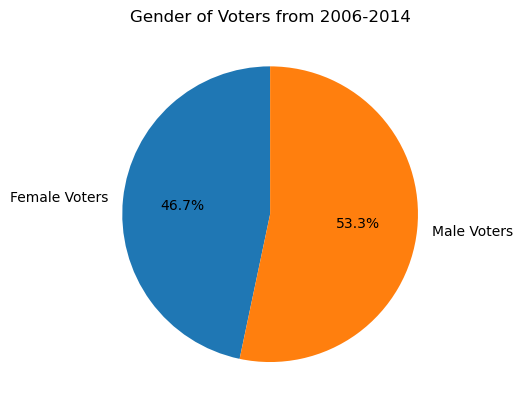

In [35]:
# FILL-IN 22

genders = ['Female Voters', 'Male Voters'] #serve as labels to distinguish percentages
values = [male_avg, female_avg] #average percentage from previous question

plt.pie(values, labels=genders, autopct='%1.1f%%', startangle=90)

# FILL-IN 23
plt.title('Gender of Voters from 2006-2014')

*There are 2 questions for the next cell because plotting commands must be in the same cell to work correctly in notebooks.*

__(24)__ Create a chart that compares the ratio of votes vs registered for the 4 age groups has changed over time.  
__(25)__ Add an appropriate title to the chart.

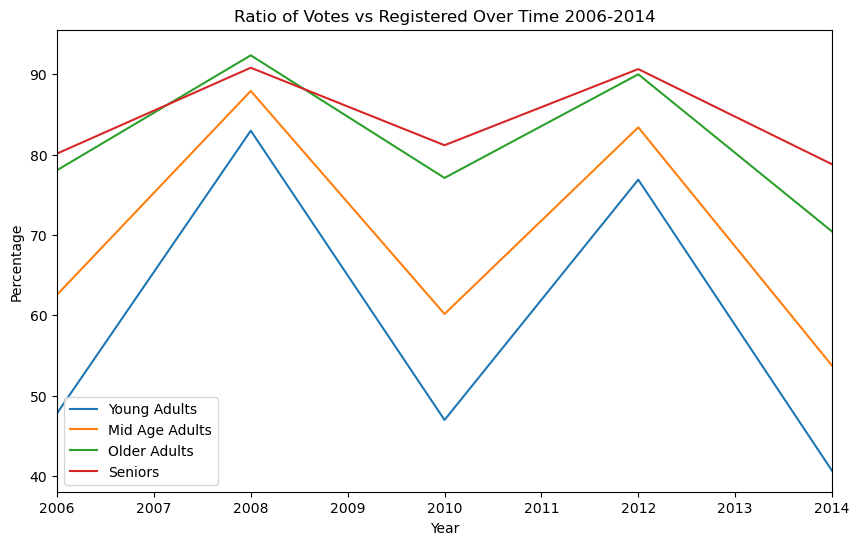

In [36]:
# FILL-IN 24
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(votes_df['Year'], votes_df['Young_Adult_Registered_VotePer'], label='Young Adults')
ax.plot(votes_df['Year'], votes_df['Mid_Age_Adults_Registered_VotePer'], label='Mid Age Adults')
ax.plot(votes_df['Year'], votes_df['Older_Adults_Registered_VotePer'], label='Older Adults')
ax.plot(votes_df['Year'], votes_df['Seniors_Registered_VotePer'], label='Seniors')

ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_xlim(2006, 2014) # set x-axis limits to only show data from 2006 to 2014
ax.legend()

# FILL-IN 25
ax.set_title('Ratio of Votes vs Registered Over Time 2006-2014')
plt.show()
